In [10]:
from wearsed.training.kfold.load_kfold import get_fold
import pandas as pd

In [11]:
test_set = []
for fold in range(4):
    _, test_ids = get_fold('fold-4-somnolyzer', fold, seed=42, path='../wearsed/training/kfold/')
    test_set += test_ids

In [ ]:
run, epoch = 'attention_gates_bottleneck', 29
outputs = []
for fold in range(4):
    output = pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/test_preds_epoch_{epoch}.csv')
    outputs.append(output)
output = pd.concat(outputs)
# recording_stops = list(y_true[y_true == -999].index)
# output = output.drop(output[output['targets'] == -999].index)
# output = output.reset_index(drop=True)
y_true, y_pred = output['targets'], output['predictions']

In [35]:
recording_stops = list(y_true[y_true == -999].index)
print(recording_stops)

[38640, 75601, 109202, 139443, 181444, 213365, 253686, 288967, 320888, 354489, 381370, 416651, 440172, 467053, 498974, 534255, 569536, 591377, 619938, 651859, 682100, 715701, 747622, 781223, 806424, 838345, 870266, 905547, 940828, 972749, 1014750, 1050031, 1080272, 1108833, 1154194, 1182755, 1211316, 1239877, 1270118, 1307079, 1340680, 1370921, 1411242, 1444843, 1486844, 1520445, 1554046, 1585967, 1619568, 1648129, 1681730, 1711971, 1745572, 1769093, 1801014, 1832935, 1864856, 1896777, 1927018, 1953899, 1989180, 2027821, 2063102, 2095023, 2126944, 2163905, 2200866, 2231107, 2264708, 2296629, 2325190, 2357111, 2380632, 2415913, 2456234, 2484795, 2504956, 2546957, 2578878, 2614159, 2641040, 2683041, 2721682, 2753603, 2790564, 2825845, 2867846, 2913207, 2941768, 2965289, 2990490, 3032491, 3069452, 3104733, 3141694, 3173615, 3205536, 3237457, 3266018, 3306339, 3348340, 3378581, 3412182, 3439063, 3474344, 3502905, 3521386, 3549947, 3585228, 3620509, 3659150, 3680991, 3712912, 3748193, 37817

<Axes: >

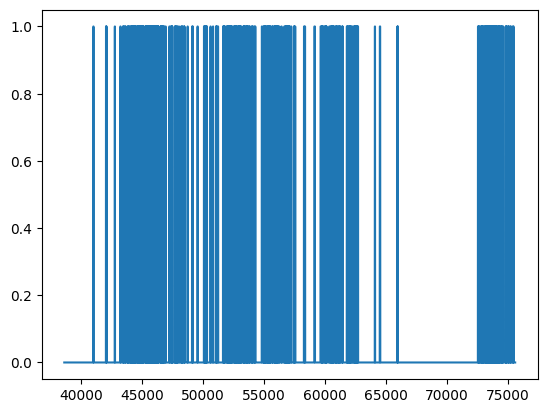

In [50]:
y_true[38641:75601].plot()

In [53]:
test_set[:5]

[6783, 5148, 4157, 856, 5224]

In [47]:
def multi_class_target(mesa_id):
    event_df = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/scorings/somnolyzer/events/events-{mesa_id:04}.csv')
    target_OSA = event_df['OSA'] | event_df['MSA']  # Count Mixed Apnea as Obstructive
    target_CSA = event_df['CSA']
    target_HYP = event_df['HYP']
    return target_OSA + 2*target_CSA + 3*target_HYP

In [54]:
target = multi_class_target(6783)

<Axes: >

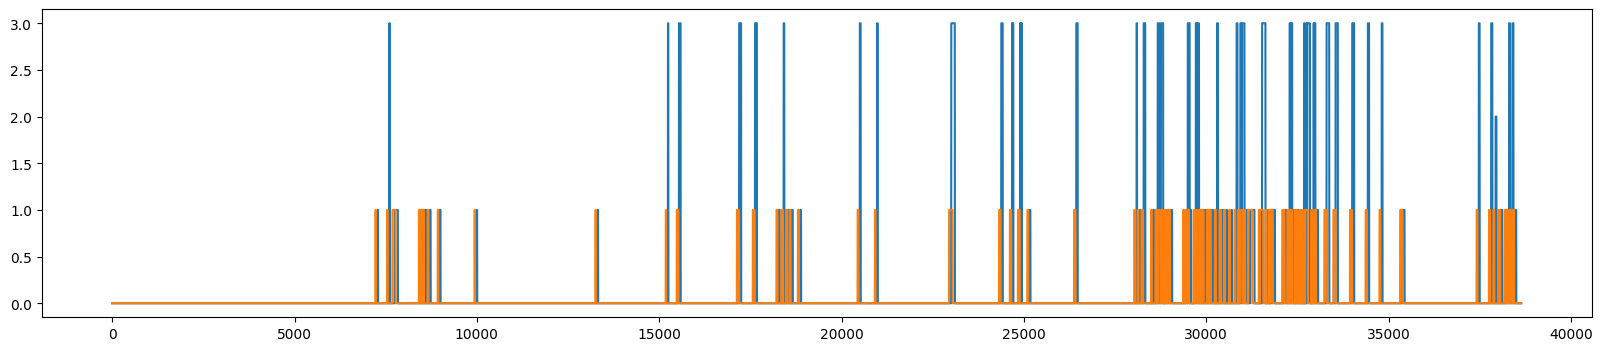

In [58]:
target[:len(y_true[:38640])].plot(figsize=(20, 4))
y_true[:38640].plot(figsize=(20, 4))

<Axes: >

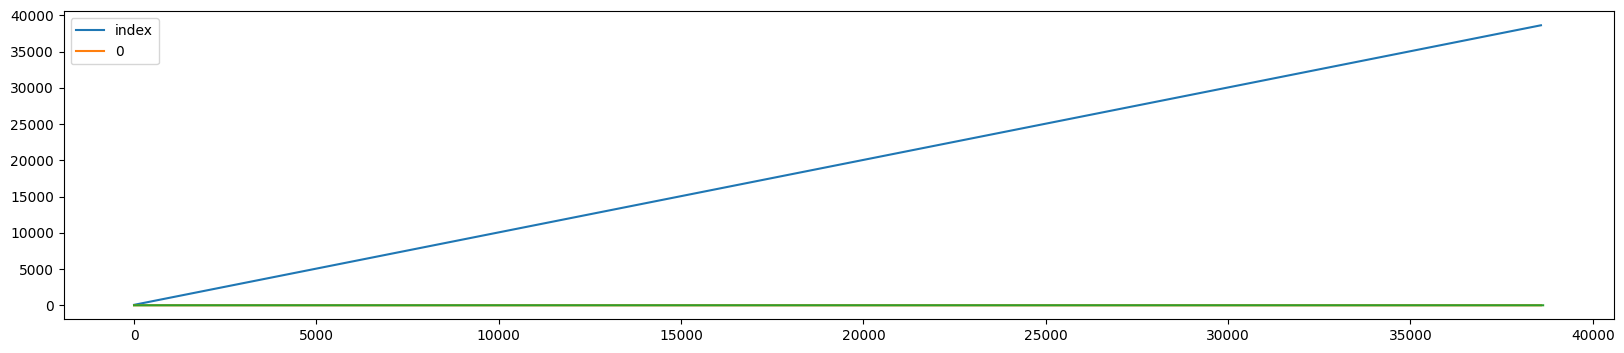

In [65]:
bla = target[60:len(y_true[:38640])]
bla = bla.reset_index()
bla.plot(figsize=(20, 4))
y_true[:38640].plot(figsize=(20, 4))

<Axes: >

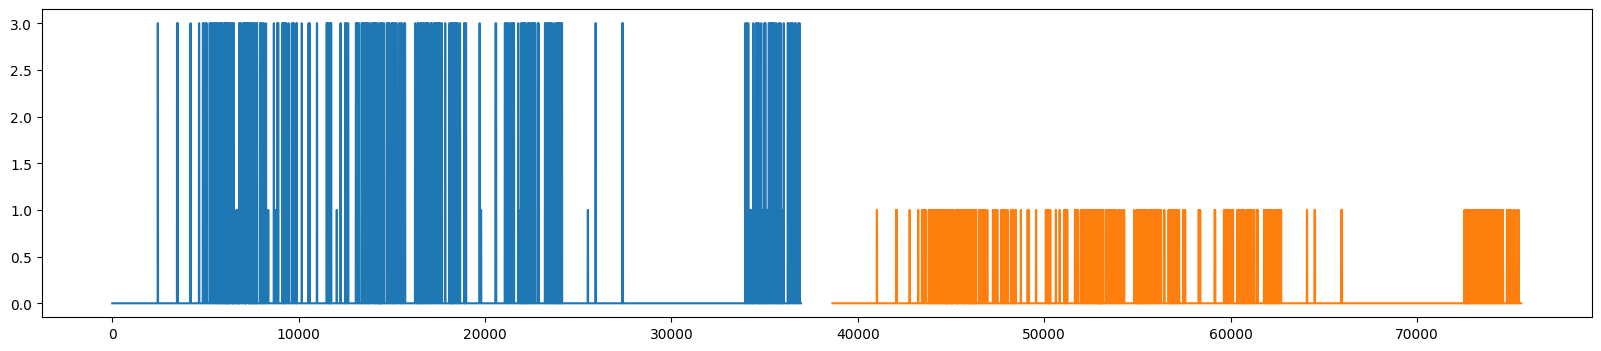

In [51]:
multi_class_target(5148)[:len(y_true[38641:75601])].plot(figsize=(20, 4))
y_true[38641:75601].plot(figsize=(20, 4))

In [100]:
run, epoch = 'attention_gates_bottleneck', 29
outputs = []
for fold in range(4):
    output = pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/test_preds_epoch_{epoch}.csv')
    outputs.append(output)
output = pd.concat(outputs)
# output = output.drop(output[output['targets'] == -999].index)
output = output.reset_index(drop=True)
recording_stops = list(y_true[y_true == -999].index)
# y_true, y_pred = output['targets'], output['predictions']

In [124]:
from tqdm import tqdm
multi_class_y_pred = []
for start, end, mesa_id in tqdm(list(zip([0] + recording_stops, recording_stops, test_set))):
    multi_class_y_pred += list(multi_class_target(mesa_id)[60:60+end-start])
    # multi_class_y_pred.append(-199)
multi_class_y_pred = pd.Series(multi_class_y_pred)

100%|██████████| 1880/1880 [00:17<00:00, 108.72it/s]


In [125]:
output['targets']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
            ...  
61352115      0.0
61352116      0.0
61352117      0.0
61352118      0.0
61352119   -999.0
Name: targets, Length: 61352120, dtype: float64

In [126]:
multi_class_y_pred

0           0
1           0
2           0
3           0
4           0
           ..
61259711    0
61259712    0
61259713    0
61259714    0
61259715    0
Length: 61259716, dtype: int64

In [127]:
bla = pd.DataFrame({
    'binary': output['targets'],
    'multiclass': multi_class_y_pred
})

<Axes: >

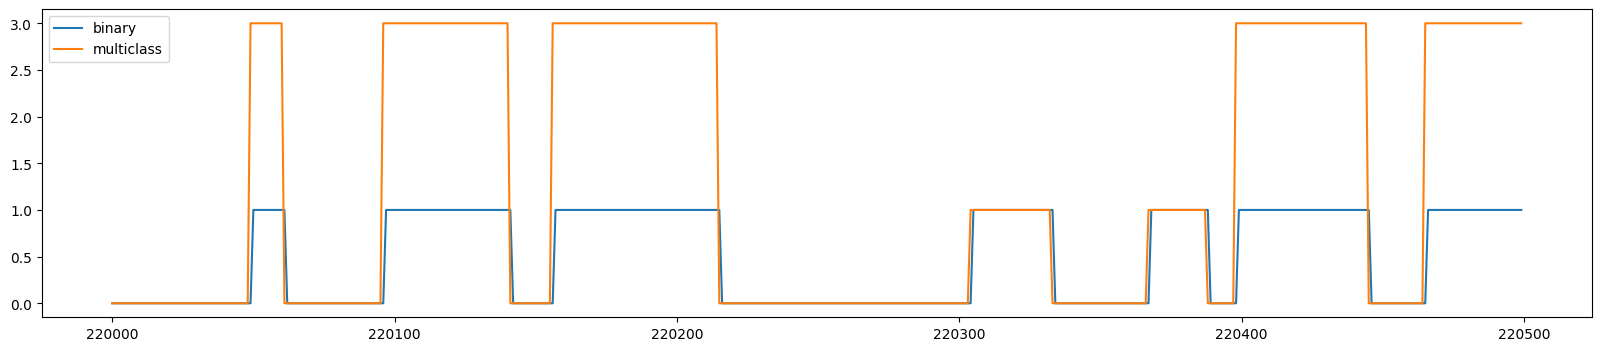

In [129]:
bla[200000+20000:200000+20500].plot(figsize=(20, 4))

<Axes: >

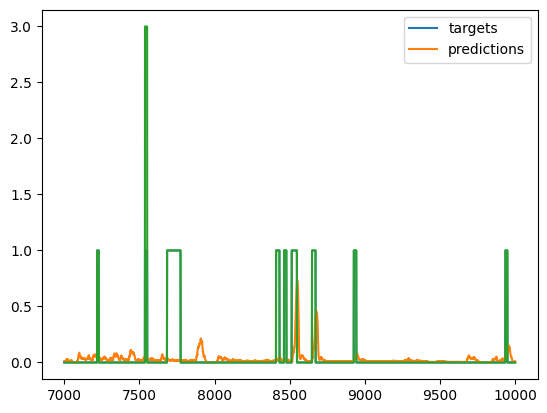

In [91]:
output[7000:10000].plot()
multi_class_y_pred[7000:10000].plot()

<Axes: >

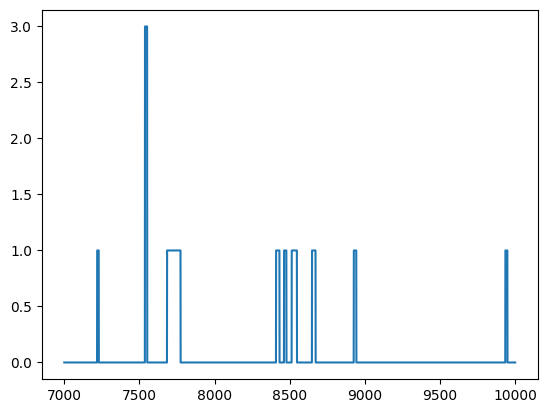

In [83]:
print(len(output))
print(len(multi_class_y_pred))

61352120
61261596


In [69]:
print(recording_stops)

[38640, 75601, 109202, 139443, 181444, 213365, 253686, 288967, 320888, 354489, 381370, 416651, 440172, 467053, 498974, 534255, 569536, 591377, 619938, 651859, 682100, 715701, 747622, 781223, 806424, 838345, 870266, 905547, 940828, 972749, 1014750, 1050031, 1080272, 1108833, 1154194, 1182755, 1211316, 1239877, 1270118, 1307079, 1340680, 1370921, 1411242, 1444843, 1486844, 1520445, 1554046, 1585967, 1619568, 1648129, 1681730, 1711971, 1745572, 1769093, 1801014, 1832935, 1864856, 1896777, 1927018, 1953899, 1989180, 2027821, 2063102, 2095023, 2126944, 2163905, 2200866, 2231107, 2264708, 2296629, 2325190, 2357111, 2380632, 2415913, 2456234, 2484795, 2504956, 2546957, 2578878, 2614159, 2641040, 2683041, 2721682, 2753603, 2790564, 2825845, 2867846, 2913207, 2941768, 2965289, 2990490, 3032491, 3069452, 3104733, 3141694, 3173615, 3205536, 3237457, 3266018, 3306339, 3348340, 3378581, 3412182, 3439063, 3474344, 3502905, 3521386, 3549947, 3585228, 3620509, 3659150, 3680991, 3712912, 3748193, 37817

<Axes: >

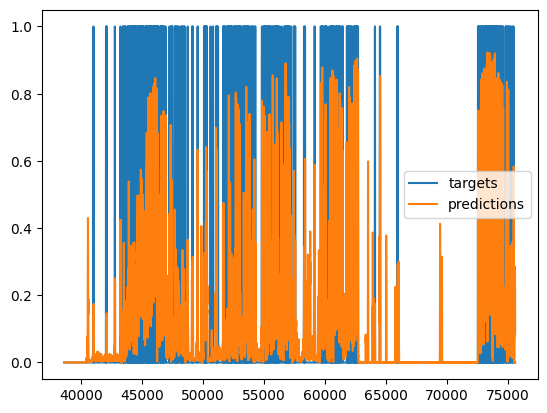

In [73]:
output[38640+1:75601].plot()